In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy

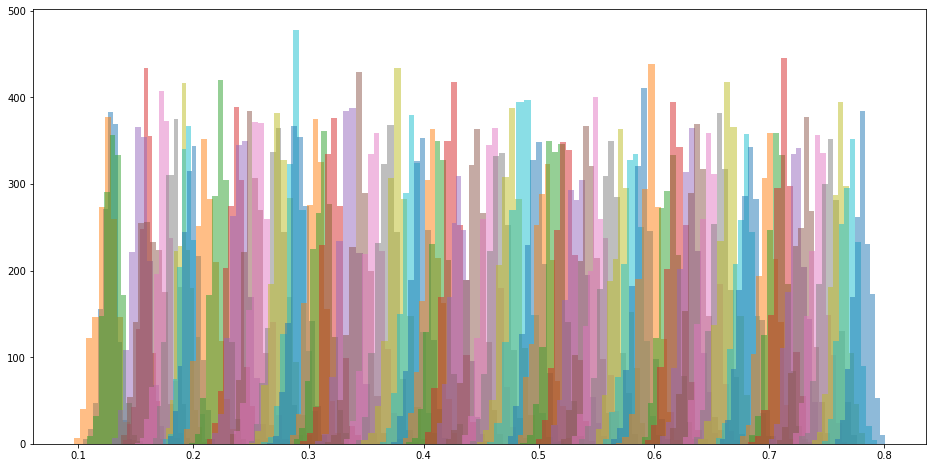

In [7]:
plt.figure(figsize=(16,8))
for i in range(0,71):
    at=np.loadtxt(str(i)+"-wham.dat")
    a=np.transpose(at)
    plt.hist(a[-1],bins=10, alpha=0.5)

In [ ]:
a=pd.read_csv('pmf-3.dat', header=None, delim_whitespace=True, comment='#')

a.columns = ['r', 'pmf', 'e1','prob', 'e2']

plt.errorbar(a.r, a.pmf+2*0.001987*300*np.log(a.r), yerr=a.e1)
#plt.errorbar(a.r, a.pmf, yerr=a.e1)
plt.xlabel('R (nm)')
plt.ylabel('Free Energy (Kcal/mol)')
#plt.savefig('pmf-corrected-6-bin100.png')

In [2]:
from sklearn.decomposition import PCA
from scipy.spatial import distance as sdist
import mdtraj as md
import seaborn as sns
import prody

In [3]:
components = np.loadtxt("../../../../RRMs/free/free/new_cartesin_components.dat")
mean = np.loadtxt("../../../../RRMs/free/free/new_cartesin_mean_coords.dat")
ref = md.load("../../../../RRMs/free/free/1/freeRRMs-openmmawsem.pdb")
n = np.loadtxt("../../../../RRMs/free/free/nail.index")
nail = [a.index for a in ref.topology.atoms if a.name == 'CA' and a.residue.index in n]

In [4]:
for f in range(0,71):
    traj = md.load('%i/movie.pdb'%f)
    traj_nail = [a.index for a in traj.topology.atoms if a.name == 'CA' and a.residue.index-5 in n]
    traj_aligned = traj.superpose(ref, atom_indices=traj_nail, ref_atom_indices=nail, parallel=False)
    CA = [a.index for a in traj.topology.atoms if a.name == 'CA' and a.residue.index-5 < 200]
    coords = traj_aligned.restrict_atoms(CA).xyz.reshape(traj_aligned.n_frames, len(CA) * 3)

    centered_coords = coords - mean
    proj = np.dot(components[0], centered_coords.T)
    np.savetxt("%i-wham-pc0.dat"%f, proj)

In [ ]:
plt.figure(figsize=(16,8))
for i in range(1,121):
    at=np.loadtxt(str(i)+"-wham.dat")
    a=np.transpose(at)
    plt.hist(a[-1],bins=10, alpha=0.5)

In [ ]:
at=np.loadtxt("n_1-wham.dat")
a=np.transpose(at)
plt.hist(a[-1],bins=20, alpha=0.5)

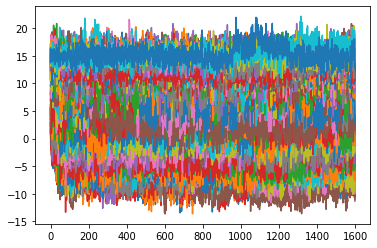

In [6]:
for f in range(0,71):
    proj=np.loadtxt("%i-wham-pc0.dat"%f)
    plt.plot(proj)

In [ ]:
a=pd.read_csv('2dpmf-3.dat', header=None, delim_whitespace=True, comment='#')

a.columns = ['beta', 'alpha', 'pmf','prob']
b=a[a.pmf<9999]

#b.pmf[b.pmf>9999] = np.max(a.pmf) + 1
#levels=np.arange(0.0, np.max(a.pmf) + 0.4, 0.4)
#b.pmf[b.pmf>9999] = 20
#b.pmf[b.pmf>20] = 20
#levels=np.arange(-2, 20, 0.5)
levels=np.arange(0, 13, 0.5)

plt.figure(figsize=(9,7.5))
ax = plt.gca()
minp=np.min(b.pmf+2*0.001987*300*np.log(b.beta))
CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.beta)-minp, levels, cmap=plt.get_cmap('jet'))
#CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.beta), levels, cmap=plt.get_cmap('jet'))
cbar = plt.colorbar(CS, ax=ax)
cbar.ax.tick_params(labelsize=18)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0.3,5.3)
plt.ylim(-17,30)
plt.xlabel("R (nm)", fontsize=24)
plt.ylabel("PC0", fontsize=24)
plt.savefig("2dpmf.png")

In [ ]:
tmp=[]
plt.figure(figsize=(16,8))
for i in range(1,17):
    at=np.loadtxt("n_" + str(i)+"-wham.dat")
    a=np.transpose(at)
   # plt.hist(a[-1]-(1.1+0.05*i),bins=10, alpha=0.5)
    tmp.append((np.dot(a[-1]-(0.3+0.05*i),a[-1]-(0.3+0.05*i))/len(a[-1]))**0.5)
for i in range(1,81):
    at=np.loadtxt(str(i)+"-wham.dat")
    a=np.transpose(at)
   # plt.hist(a[-1]-(1.1+0.05*i),bins=10, alpha=0.5)
    tmp.append((np.dot(a[-1]-(1.1+0.05*i),a[-1]-(1.1+0.05*i))/len(a[-1]))**0.5)
    
plt.plot(tmp)

In [ ]:
tmp=[]
plt.figure(figsize=(16,8))
for i in range(1,20):
    at=np.loadtxt(str(i)+"-wham.dat")
    a=np.transpose(at)
    plt.hist(a[-1]-(1.1+0.05*i),bins=10, alpha=0.5)
    #tmp.append((np.dot(a[-1]-(1.1+0.05*i),a[-1]-(1.1+0.05*i))/len(a[-1]))**0.5)
    
plt.plot(tmp)

In [ ]:
tmp=[]
plt.figure(figsize=(16,8))
for i in range(3,10):
    at=np.loadtxt("n_" +str(i)+"-wham.dat")
    a=np.transpose(at)
    plt.hist(a[-1]-(0.3+0.05*i),bins=10, alpha=0.5)
    #tmp.append((np.dot(a[-1]-(1.1+0.05*i),a[-1]-(1.1+0.05*i))/len(a[-1]))**0.5)
    
plt.plot(tmp)

In [ ]:
b=pd.read_csv('pcpmf.dat', header=None, delim_whitespace=True, comment='#')

b.columns = ['E', 'pc', 'pmf','prob']
#b=a[a.pmf<9999]

#b.pmf[b.pmf>9999] = np.max(a.pmf) + 1
#levels=np.arange(0.0, np.max(a.pmf) + 0.4, 0.4)
#b.pmf[b.pmf>9999] = 20
#b.pmf[b.pmf>20] = 20
#levels=np.arange(-2, 20, 0.5)
levels=np.arange(0, 20, 1)

plt.figure(figsize=(9,7.5))
ax = plt.gca()
minp=np.min(b.pmf)
CS = ax.tricontourf(b.E, b.pc, b.pmf-minp, levels, cmap=plt.get_cmap('jet'))
#CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.beta), levels, cmap=plt.get_cmap('jet'))
cbar = plt.colorbar(CS, ax=ax)
cbar.ax.tick_params(labelsize=18)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(-103,1)
plt.ylim(-18,28)
plt.xlabel("dE_contact (Kcal/mol)", fontsize=24)
plt.ylabel("PC0", fontsize=24)
plt.savefig("pcpmf.png")

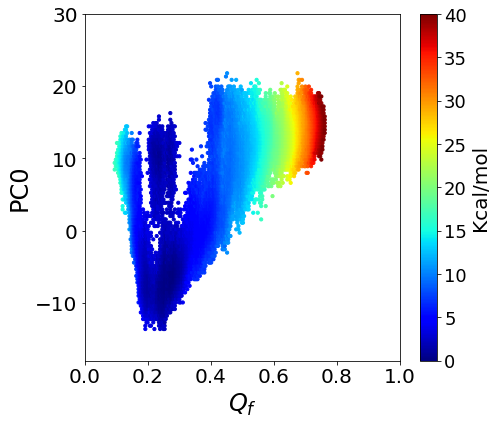

In [2]:
a=pd.read_csv('pcpmf.dat', header=None, delim_whitespace=True, comment='#')

a.columns = ['Qf', 'pc', 'pmf','prob']
#b=a[(a.E>-92) & (a.pmf<30)]
b=a[(a.pmf<40)]

plt.figure(figsize=(7,6))
ax = plt.gca()
minp=np.min(b.pmf)
CS = ax.scatter(b.Qf, b.pc, c=b.pmf-minp, s=10, cmap=plt.get_cmap('jet'),vmin=0,vmax=40)
#CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.beta), levels, cmap=plt.get_cmap('jet'))
cbar = plt.colorbar(CS, ax=ax)
cbar.ax.tick_params(labelsize=18)
cbar.set_label(label="Kcal/mol",size=20)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,1)
plt.ylim(-18,30)
plt.xlabel(r"$Q_{f}$", fontsize=24)
plt.ylabel("PC0", fontsize=24)
plt.tight_layout()
plt.savefig("pc_scatter.png")

(200, 100)
(100,)


/home/xg23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/xg23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


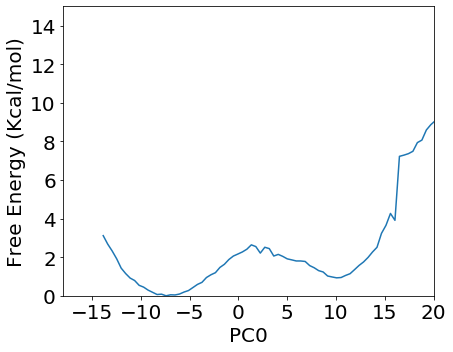

In [12]:
b=pd.read_csv('pcpmf.dat', header=None, delim_whitespace=True, comment='#')
b.columns = ['q', 'pc', 'pmf','prob']
z = b.pmf
pmf_2d = z.values.reshape(200,100)

q=np.exp(pmf_2d/(-0.001987*300))
p_2d=q/np.sum(q)
P=np.sum(p_2d,0)
print(np.shape(p_2d))
print(np.shape(P))

plt.figure(figsize=(6.4,5))
tmp_min = min(-0.001987*300*np.log(P[:]))
plt.plot(np.linspace(-18, 28, num=101)[:-1], -0.001987*300*np.log(P[:])-tmp_min)

plt.xlabel('PC0', fontsize=20)
plt.ylabel('Free Energy (Kcal/mol)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-18,20)
plt.ylim(0,15)
plt.tight_layout()
plt.savefig('pmf-pc0.png')

(200, 100)
(100,)
(200, 100)
(100,)


/home/xg23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/xg23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/home/xg23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
/home/xg23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


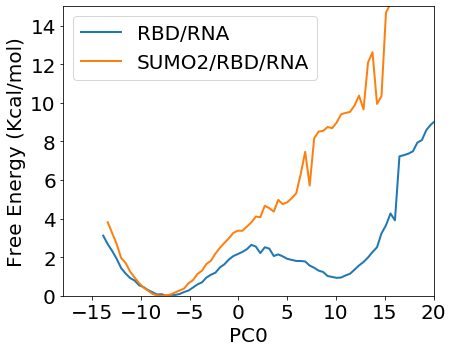

In [2]:
b=pd.read_csv('pcpmf.dat', header=None, delim_whitespace=True, comment='#')
b.columns = ['q', 'pc', 'pmf','prob']
z = b.pmf
pmf_2d = z.values.reshape(200,100)

q=np.exp(pmf_2d/(-0.001987*300))
p_2d=q/np.sum(q)
P=np.sum(p_2d,0)
print(np.shape(p_2d))
print(np.shape(P))

plt.figure(figsize=(6.4,5))
tmp_min = min(-0.001987*300*np.log(P[:]))
plt.plot(np.linspace(-18, 28, num=101)[:-1], -0.001987*300*np.log(P[:])-tmp_min, label="RBD/RNA", linewidth=2)



b=pd.read_csv('../bind-s/pcpmf.dat', header=None, delim_whitespace=True, comment='#')
b.columns = ['q', 'pc', 'pmf','prob']
z = b.pmf
pmf_2d = z.values.reshape(200,100)

q=np.exp(pmf_2d/(-0.001987*300))
p_2d=q/np.sum(q)
P=np.sum(p_2d,0)
print(np.shape(p_2d))
print(np.shape(P))

tmp_min = min(-0.001987*300*np.log(P[:]))
plt.plot(np.linspace(-18, 28, num=101)[:-1], -0.001987*300*np.log(P[:])-tmp_min, label="SUMO2/RBD/RNA", linewidth=2)


plt.xlabel('PC0', fontsize=20)
plt.ylabel('Free Energy (Kcal/mol)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-18,20)
plt.ylim(0,15)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig('../bind-pmf-pc0.png')

In [15]:
a=pd.read_csv("0-wham-2dpc.dat", header=None, delim_whitespace=True, comment='#')
Nfile=0*np.ones(len(a))
a["Nfile"]=Nfile.tolist()

for i in range(1, 71):
    at=pd.read_csv(str(i)+"-wham-2dpc.dat", header=None, delim_whitespace=True, comment='#')
    Nfile=i*np.ones(len(at))
    at["Nfile"]=Nfile.tolist()
    a=a.append(at)
len(a) 

99400

In [16]:
a.columns = ['step','q', 'pc','Nfile']
a

,step,q,pc,Nfile
0,200,0.121,10.114,0.0
1,201,0.123,8.880,0.0
2,202,0.120,9.541,0.0
3,203,0.114,8.572,0.0
4,204,0.119,11.211,0.0
...,...,...,...,...
1395,1595,0.777,18.057,70.0
1396,1596,0.788,14.643,70.0
1397,1597,0.780,16.400,70.0
1398,1598,0.779,12.772,70.0


In [19]:
q=0.22
PC=10

dq=0.01
dpc=0.05
tmp=a[(a.q<q+dq)&(a.q>q-dq)&(a.pc<PC+dpc)&(a.pc>PC-dpc)]
tmp

,step,q,pc,Nfile
133,333,0.214,9.956,12.0
317,517,0.228,10.044,12.0
400,600,0.227,10.040,12.0
446,646,0.229,9.990,12.0
518,718,0.216,10.024,12.0
806,1006,0.213,9.960,12.0
950,1150,0.222,9.966,12.0
1062,1262,0.222,10.007,12.0
1099,1299,0.218,9.984,12.0
1100,1300,0.226,9.998,12.0
